In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import csv

In [5]:
#Combine all csv's into one dataframe 
csv_list = ["df_78745.csv","df_78705.csv","df_78729","df_78732","df_78702.csv"]
list_df = []
for file in csv_list:
    list_df.append(pd.read_csv(file))
merged_df = pd.concat(list_df)
#Get rid of unnecessary columns
del merged_df["Unnamed: 0"]
#Rename columns
merged_df.columns = ["Zip Code", "Property Type", "Square Feet",  "Market Value", "Year Built"]
merged_df

,Zip Code,Property Type,Square Feet,Market Value,Year Built
0,78745,RESIDENTIAL ACREAGE,0,24275,0
1,78745,TYPE UNKNOWN,0,80000,0
2,78745,RESIDENTIAL ACREAGE,3900,2240000,1979
3,78745,COMMON AREA,12120,908619,1985
4,78745,COMMON AREA,6825,3238978,2001
...,...,...,...,...,...
995,78702,SFR,2290,614293,1935
996,78702,COMMON AREA,12804,1979201,1951
997,78702,SFR,804,522609,1927
998,78702,SFR,1282,416124,1949


In [ ]:
#New df with the 3 main properties we are looking at 
df = merged_df.loc[(merged_df["Property Type"]=="SFR")|(merged_df["Property Type"]=="CONDOMINIUM")|
                   (merged_df["Property Type"]=="DUPLEX")]
#Get rid of zeros in data
df = df.loc[df["Square Feet"]!=0,:]
df = df.loc[df["Market Value"]!=0,:]
#Add price per sqft column
df["Price per SqFt"] = df["Market Value"]/df["Square Feet"]
df.columns = ["Zip Code", "Property Type", "Avg. Square Feet", "Avg. Market Value", "Avg. Year Built", "Avg. Price per SqFt"]
df

# Finding average price per square foot and average market value across zip codes

In [31]:
#Group the dataframe by zip code and then property type
grouped_df = df.groupby(["Zip Code","Property Type"])
#Take the average of each property type
grouped_df.mean()

Avg. Square Feet  Avg. Market Value  Avg. Year Built  \
Zip Code Property Type                                                         
78702    CONDOMINIUM         1461.114286      504605.457143      1999.952381   
         DUPLEX              2183.785714      683097.928571      1958.357143   
         SFR                 1455.589316      555465.455760      1956.178631   
78705    CONDOMINIUM         1013.770045      364834.214826      1982.069592   
         DUPLEX              3112.440000      585597.880000      1956.400000   
         SFR                 2379.933333      683352.222222      1942.555556   
78729    CONDOMINIUM         1388.595890      214910.897260      1998.541096   
         DUPLEX              2139.893333      330174.000000      1984.626667   
         SFR                 2136.465079      325089.504762      1986.374603   
78732    CONDOMINIUM         3531.666667      467836.777778      2013.000000   
         DUPLEX              2904.000000      335254.000000      1975.000000   
         SFR                 4042.637850      674259.292056      2004.408879   
78745    CONDOMINIUM         1289.255814      236335.441860      2016.511628   
         DUPLEX              1962.600000      320915.866667      1976.000000   
         SFR                 2044.159061      302204.040417      1986.528031   

                        Avg. Price per SqFt  
Zip Code Property Type                       
78702    CONDOMINIUM             363.625691  
         DUPLEX                  352.858455  
         SFR                     435.794297  
78705    CONDOMINIUM             343.923109  
         DUPLEX                  206.198574  
         SFR                     314.118978  
78729    CONDOMINIUM             157.372762  
         DUPLEX                  154.839955  
         SFR                     157.086403  
78732    CONDOMINIUM             133.648721  
         DUPLEX                  115.445592  
         SFR                     174.311972  
78745    CONDOMINIUM             186.649675  
         DUPLEX                  168.292881  
         SFR                     153.444067

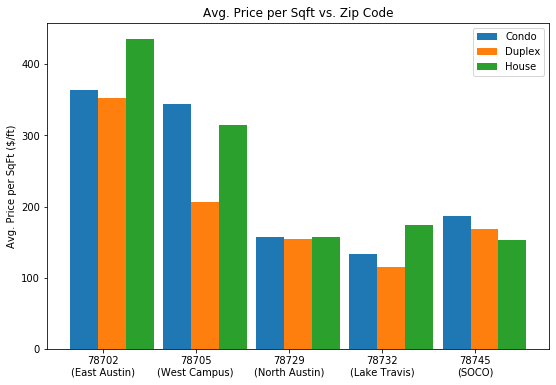

In [40]:
labels = ['78702\n(East Austin)','78705\n(West Campus)','78729\n(North Austin)','78732\n(Lake Travis)', '78745\n(SOCO)']
x = np.arange(len(labels))
width = 0.3
condo = [363,343.9,157.4,133.6,186.65]
duplex = [352.8, 206.2, 154.8, 115.4, 168.3]
sfr = [435.8, 314, 157.4, 174.3, 153.4]

fig, ax = plt.subplots(figsize = (9,6))
condo_plt = ax.bar(x-width/1.5, condo,width, label = "Condo")
dup_plt = ax.bar(x+width/3, duplex,width,label = "Duplex")
sfr_plt = ax.bar(x+(.1+width), sfr,width,label = "House")

ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylabel("Avg. Price per SqFt ($/ft)")
ax.set_title("Avg. Price per Sqft vs. Zip Code")
fig.savefig("Avg_Price_per_SqFt.png")
ax.legend()

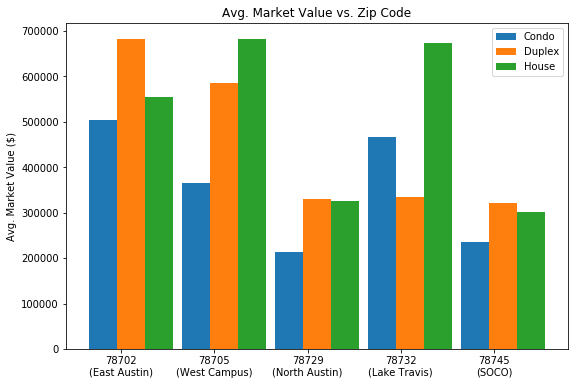

In [39]:
labels = ['78702\n(East Austin)','78705\n(West Campus)','78729\n(North Austin)','78732\n(Lake Travis)', '78745\n(SOCO)']
x = np.arange(len(labels))
width = 0.3
condo = [504605.5,364834.2,214910.9,467386.8,236335.4]
duplex = [683097.9,585597.9, 330174, 335254, 320915.9]
sfr = [555465.5, 683352.2, 325089.5, 674259.3, 302204]

fig, ax = plt.subplots(figsize = (9,6))
condo_plt = ax.bar(x-width/1.5, condo,width, label = "Condo")
dup_plt = ax.bar(x+width/3, duplex,width,label = "Duplex")
sfr_plt = ax.bar(x+(.1+width), sfr,width,label = "House")

ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylabel("Avg. Market Value ($)")
ax.set_title("Avg. Market Value vs. Zip Code")
fig.savefig("Avg_Market_Value.png")
ax.legend()

# Finding price of houses across time

In [6]:
bins = [1889,1909,1919,1929,1939,1949,1959,1969,1979,1989,1999,2009,2019]
bin_labels = ["1900's","1910's","1920's","1930's","1940's","1950's","1960's","1970's","1980's","1990's","2000's","2010's"]
merged_df["Decade Built"] = pd.cut(merged_df["Year Built"],bins,labels=bin_labels)
decade_df = merged_df.sort_values(["Decade Built"], ascending=True)
decade_df

,Zip Code,Property Type,Square Feet,Market Value,Year Built,Decade Built
608,78705,SFR,3360,714315,1892,1900's
508,78702,RESIDENTIAL ACREAGE,0,350000,1902,1900's
112,78705,SFR,0,682787,1908,1900's
454,78705,SFR,3390,486600,1903,1900's
182,78705,SFR,1460,561600,1900,1900's
...,...,...,...,...,...,...
659,78702,RESIDENTIAL ACREAGE,0,14401482,0,NaN
660,78702,RESIDENTIAL ACREAGE,0,12652350,0,NaN
741,78702,CONDOMINIUM,0,159250,0,NaN
775,78702,TYPE UNKNOWN,0,447434,0,NaN


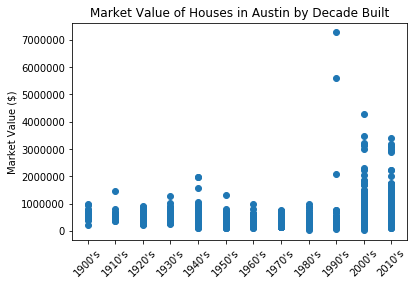

In [8]:
sfr_df = decade_df[decade_df["Property Type"] == "SFR"]
sfr_df = sfr_df.dropna()

output_png1 = "Nick_Fig1.png"
output_png2 = "Nick_Fig2.png"
output_png3 = "Nick_Fig3.png"
x = sfr_df["Decade Built"].tolist()
y = sfr_df["Market Value"].tolist()
plt.scatter(x,y)
plt.title("Market Value of Houses in Austin by Decade Built")
plt.ylabel("Market Value ($)")
plt.xticks(rotation=45)
plt.savefig(output_png1)
plt.show()

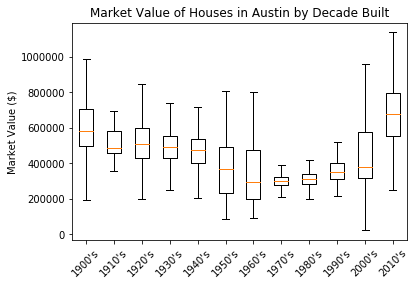

In [9]:
a = sfr_df.loc[sfr_df["Decade Built"] == "1900's",["Market Value"]]
b = sfr_df.loc[sfr_df["Decade Built"] == "1910's",["Market Value"]]
c = sfr_df.loc[sfr_df["Decade Built"] == "1920's",["Market Value"]]
d = sfr_df.loc[sfr_df["Decade Built"] == "1930's",["Market Value"]]
e = sfr_df.loc[sfr_df["Decade Built"] == "1940's",["Market Value"]]
f = sfr_df.loc[sfr_df["Decade Built"] == "1950's",["Market Value"]]
g = sfr_df.loc[sfr_df["Decade Built"] == "1960's",["Market Value"]]
h = sfr_df.loc[sfr_df["Decade Built"] == "1970's",["Market Value"]]
i = sfr_df.loc[sfr_df["Decade Built"] == "1980's",["Market Value"]]
j = sfr_df.loc[sfr_df["Decade Built"] == "1990's",["Market Value"]]
k = sfr_df.loc[sfr_df["Decade Built"] == "2000's",["Market Value"]]
l = sfr_df.loc[sfr_df["Decade Built"] == "2010's",["Market Value"]]

decade_vals = [a["Market Value"].tolist(),
               b["Market Value"].tolist(),
               c["Market Value"].tolist(),
               d["Market Value"].tolist(),
               e["Market Value"].tolist(),
               f["Market Value"].tolist(),
               g["Market Value"].tolist(),
               h["Market Value"].tolist(),
               i["Market Value"].tolist(),
               j["Market Value"].tolist(),
               k["Market Value"].tolist(),
               l["Market Value"].tolist()]

plt.boxplot(decade_vals,showfliers=False)
plt.title("Market Value of Houses in Austin by Decade Built")
x_axis = [1,2,3,4,5,6,7,8,9,10,11,12]
x_ticks = bin_labels
plt.xticks(x_axis, x_ticks)
plt.xticks(rotation=45)
plt.ylabel("Market Value ($)")
plt.savefig(output_png2)
plt.show()

plt

In [10]:
avg_df = sfr_df.groupby(["Decade Built"])["Market Value"].mean()
avg_value = []
for i in range(len(avg_df)): 
    avg_value.append(avg_df[i])

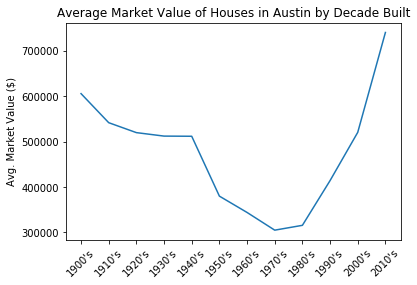

In [11]:
plt.plot(bin_labels,avg_value)
plt.title("Average Market Value of Houses in Austin by Decade Built")
plt.ylabel("Avg. Market Value ($)")
plt.xticks(rotation=45)
plt.savefig(output_png3)
plt.show()

# Finding count of homes based on decade built

In [109]:
 #Get rid of zeros in data
properties = decade_df.loc[decade_df["Square Feet"]!=0,:]
properties = decade_df.loc[decade_df["Market Value"]!=0,:]
properties = decade_df.loc[decade_df["Year Built"]!=0,:]
#Create new data frames looking at specific properties
sfr = properties[(properties["Property Type"] == "SFR")]
condo = properties[(properties["Property Type"] == "CONDOMINIUM")]
dup = properties[(properties["Property Type"] == "DUPLEX")]

In [110]:
#Take the count of each property type per decade
sfr_df = sfr.groupby(["Decade Built"])["Market Value"].count()
sfr_count = []
for i in range(len(sfr_df)): 
    sfr_count.append(sfr_df[i])
sfr_df
condo_df = condo.groupby(["Decade Built"])["Market Value"].count()
condo_count = []
for i in range(len(condo_df)): 
    condo_count.append(condo_df[i])
condo_df
dup_df = dup.groupby(["Decade Built"])["Market Value"].count()
dup_count = []
for i in range(len(dup_df)): 
    dup_count.append(dup_df[i])

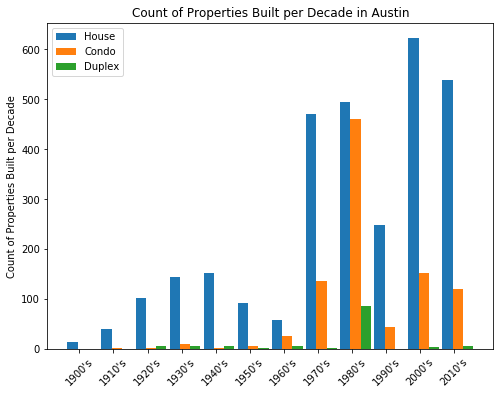

In [111]:
#Plot the data
width = 0.3
x = np.arange(len(bin_labels))
fig, ax = plt.subplots(figsize = (8,6))
sfr_plt = ax.bar(x-width/1.5,sfr_count, width, label = "House")
condo_plt = ax.bar(x+width/3,condo_count, width, label = "Condo")
dup_plt = ax.bar(x+(.1+width),dup_count, width, label = "Duplex")

ax.set_xticks(x)
ax.set_xticklabels(bin_labels)
plt.title("Count of Properties Built per Decade in Austin")
plt.ylabel("Count of Properties Built per Decade")
plt.xticks(rotation=45)
ax.legend()
fig.savefig("Property_count_year.png")

plt.show()

In [ ]:
###### merged_df=pd.read_csv('merged.csv')  
merged_df = merged_df.drop(columns="Unnamed: 0")

#merged_df.head()

Property Type
COMMON AREA               49
CONDOMINIUM               43
DUPLEX                    15
FARMS                      4
MOBILE HOME               75
MULTI FAMILY DWELLING      2
RESIDENTIAL ACREAGE       34
SFR                      776
TYPE UNKNOWN               2
dtype: int64


Text(0, 0.5, 'Property Count')

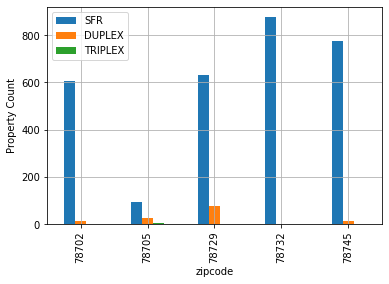

In [17]:
zipcode = merged_df.groupby(["Zip Code","Property Type"]).size()
x= {"Zipcode":zipcode }

print(zipcode[78745])
df_78702 = merged_df.loc[merged_df["Zip Code"] == 78702]
df_78705 = merged_df.loc[merged_df["Zip Code"] == 78705]
df_78729 = merged_df.loc[merged_df["Zip Code"] == 78729]
df_78732 = merged_df.loc[merged_df["Zip Code"] == 78732]
df_78745 = merged_df.loc[merged_df["Zip Code"] == 78745]

#making new df that easily plotted
data = [
{"zipcode": 78702, "SFR": zipcode[78702]["SFR"], "DUPLEX": zipcode[78702]["DUPLEX"], "TRIPLEX": zipcode[78702]["TRIPLEX"]},
{"zipcode": 78705, "SFR": zipcode[78705]["SFR"], "DUPLEX": zipcode[78705]["DUPLEX"], "TRIPLEX": zipcode[78705]["TRIPLEX"]},                
{"zipcode": 78729, "SFR": zipcode[78729]["SFR"], "DUPLEX": zipcode[78729]["DUPLEX"], "TRIPLEX": 0},
{"zipcode": 78732, "SFR": zipcode[78732]["SFR"], "DUPLEX": zipcode[78732]["DUPLEX"], "TRIPLEX": zipcode[78732]["TRIPLEX"]},
{"zipcode": 78745, "SFR": zipcode[78745]["SFR"], "DUPLEX": zipcode[78745]["DUPLEX"], "TRIPLEX": 0}
]

data_df = pd.DataFrame(data)
data_df.head()

fig = data_df.plot(x="zipcode", y=["SFR", "DUPLEX", "TRIPLEX"], kind="bar", grid=True)
plt.ylabel("Property Count")


# Property count per zip code

In [18]:
merged_df_cleaned = merged_df.loc[merged_df["Sqaure Feet"] != 0,:]
merged_df_cleaned = merged_df_cleaned.loc[merged_df_cleaned["Market Value"] !=0,:]
merged_df_cleaned = merged_df_cleaned.loc[merged_df_cleaned["Year Built"]!=0,:]

#merged_df_cleaned=merged_df.dropna()
merged_df_cleaned

,Zip Code,Property Type,Sqaure Feet,Market Value,Year Built
2,78745,RESIDENTIAL ACREAGE,3900,2240000,1979
3,78745,COMMON AREA,12120,908619,1985
4,78745,COMMON AREA,6825,3238978,2001
5,78745,COMMON AREA,65800,7478809,2009
6,78745,COMMON AREA,12120,1144169,1985
...,...,...,...,...,...
4995,78702,SFR,2290,614293,1935
4996,78702,COMMON AREA,12804,1979201,1951
4997,78702,SFR,804,522609,1927
4998,78702,SFR,1282,416124,1949


In [19]:
limited = merged_df_cleaned.loc[merged_df_cleaned['Property Type'].isin(['SFR','DUPLEX','CONDOMINIUM'])]
limited

,Zip Code,Property Type,Sqaure Feet,Market Value,Year Built
30,78745,DUPLEX,1872,184570,1948
40,78745,SFR,1491,236137,1976
41,78745,DUPLEX,2837,368992,1980
42,78745,DUPLEX,1731,329841,1980
43,78745,SFR,1950,310400,1976
...,...,...,...,...,...
4994,78702,SFR,1557,402961,1995
4995,78702,SFR,2290,614293,1935
4997,78702,SFR,804,522609,1927
4998,78702,SFR,1282,416124,1949


In [20]:
##Find count of each property type, what property types are most popular?
#group by data by zipcode and property type
df_combined = limited.groupby(["Zip Code", "Property Type"])
#count all of the data in each property 
df_combined_count = df_combined.count()["Sqaure Feet"]
df_combined_count

Zip Code  Property Type
78702     CONDOMINIUM      105
          DUPLEX            14
          SFR              599
78705     CONDOMINIUM      661
          DUPLEX            25
          SFR               90
78729     CONDOMINIUM      146
          DUPLEX            75
          SFR              630
78732     CONDOMINIUM        9
          DUPLEX             1
          SFR              856
78745     CONDOMINIUM       43
          DUPLEX            15
          SFR              767
Name: Sqaure Feet, dtype: int64

In [21]:
df_78702 = limited.loc[ limited["Zip Code"]==78702]
sr_78702 = df_78702["Property Type"].value_counts()

df_78705 = limited.loc[ limited["Zip Code"]==78705]
sr_78705 = df_78705["Property Type"].value_counts()

df_78729 = limited.loc[ limited["Zip Code"]==78729]
sr_78729 = df_78729["Property Type"].value_counts()

df_78732 = limited.loc[ limited["Zip Code"]==78732]
sr_78732 = df_78732["Property Type"].value_counts()

df_78745 = limited.loc[ limited["Zip Code"]==78745]
sr_78745 = df_78745["Property Type"].value_counts()


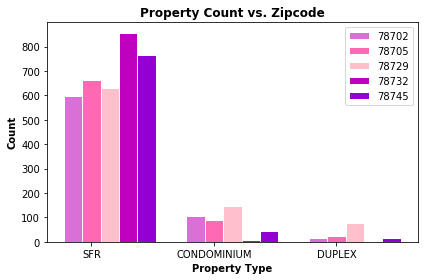

In [73]:
# set width of bar
barWidth = 0.15
 
# set height of bar
bars1 = sr_78702
bars2 = sr_78705
bars3 = sr_78729
bars4 = sr_78732
bars5 = sr_78745

# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]

# Make the plot
plt.bar(r1, bars1, color='orchid', width=barWidth, edgecolor='white', label='78702')
plt.bar(r2, bars2, color='hotpink', width=barWidth, edgecolor='white', label='78705')
plt.bar(r3, bars3, color='pink', width=barWidth, edgecolor='white', label='78729')
plt.bar(r4, bars4, color='m', width=barWidth, edgecolor='white', label='78732')
plt.bar(r5, bars5, color='darkviolet', width=barWidth, edgecolor='white', label='78745')

# Add xticks on the middle of the group bars
plt.xlabel('Property Type', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['SFR', 'CONDOMINIUM', 'DUPLEX'])
plt.title("Property Count vs. Zipcode",fontweight='bold')

plt.tight_layout()

# Create legend & Show graphic
plt.legend()

#export the graph as a png
plt.savefig('property_count.png')
plt.show()


In [97]:
#File to load
data_78702 = "df_78702.csv"
data_78705 = "df_78705.csv"
data_78729 = "df_78729"
data_78732 = "df_78732"
data_78745 = "df_78745.csv"

# Read the data and store into Pandas Data Frames
df_78702 = pd.read_csv(data_78702)
df_78705 = pd.read_csv(data_78705)
df_78729 = pd.read_csv(data_78729)
df_78732 = pd.read_csv(data_78732)
df_78745 = pd.read_csv(data_78745)

In [98]:
#Rename and drop columns
df_78702 = df_78702.rename(columns={'Avg. Sq Ft':'Square Footage', 'Avg. Market Value':'Market Value', 'Avg. Year Built':'Year Built'})
df_78702 = df_78702[['Zip Code', 'Property Type', 'Square Footage', 'Market Value', 'Year Built']]

df_78705 = df_78705.rename(columns={'Avg. Sq Ft':'Square Footage', 'Avg. Market Value':'Market Value', 'Avg. Year Built':'Year Built'})
df_78705 = df_78705[['Zip Code', 'Property Type', 'Square Footage', 'Market Value', 'Year Built']]

df_78729 = df_78729.rename(columns={'Avg. Sq Ft':'Square Footage', 'Avg. Market Value':'Market Value', 'Avg. Year Built':'Year Built'})
df_78729 = df_78729[['Zip Code', 'Property Type', 'Square Footage', 'Market Value', 'Year Built']]

df_78732 = df_78732.rename(columns={'Avg. Sq Ft':'Square Footage', 'Avg. Market Value':'Market Value', 'Avg. Year Built':'Year Built'})
df_78732 = df_78732[['Zip Code', 'Property Type', 'Square Footage', 'Market Value', 'Year Built']]

df_78745 = df_78745.rename(columns={'Avg. Sq Ft':'Square Footage', 'Avg. Market Value':'Market Value', 'Avg. Year Built':'Year Built'})
df_78745 = df_78745[['Zip Code', 'Property Type', 'Square Footage', 'Market Value', 'Year Built']]

df_78705.head()

,Zip Code,Property Type,Square Footage,Market Value,Year Built
0,78705,TYPE UNKNOWN,0,602600,0
1,78705,COMMON AREA,0,128228,2009
2,78705,RESIDENTIAL ACREAGE,0,64999800,1950
3,78705,RESIDENTIAL ACREAGE,0,2470500,1959
4,78705,COMMON AREA,0,1312500,1979


In [99]:
#add Price per SqFt column
df_78745["Price per SqFt"] = round(df_78745["Market Value"]/df_78745["Square Footage"],2)
df_78732["Price per SqFt"] = round(df_78732["Market Value"]/df_78732["Square Footage"],2)
df_78729["Price per SqFt"] = round(df_78729["Market Value"]/df_78729["Square Footage"],2)
df_78705["Price per SqFt"] = round(df_78705["Market Value"]/df_78705["Square Footage"],2)
df_78702["Price per SqFt"] = round(df_78702["Market Value"]/df_78702["Square Footage"],2)

In [100]:
#Remove all other property types except SFR, Condos, and Duplexes
df_78702 = df_78702.loc[(df_78702["Property Type"]=="CONDOMINIUM")|(df_78702["Property Type"]=="DUPLEX")|
                        (df_78702["Property Type"]=="SFR"),:]
df_78705 = df_78705.loc[(df_78705["Property Type"]=="CONDOMINIUM")|(df_78705["Property Type"]=="DUPLEX")|
                        (df_78705["Property Type"]=="SFR"),:]
df_78729 = df_78729.loc[(df_78729["Property Type"]=="CONDOMINIUM")|(df_78729["Property Type"]=="DUPLEX")|
                        (df_78729["Property Type"]=="SFR"),:]
df_78732 = df_78732.loc[(df_78732["Property Type"]=="CONDOMINIUM")|(df_78732["Property Type"]=="DUPLEX")|
                        (df_78732["Property Type"]=="SFR"),:]
df_78745 = df_78745.loc[(df_78745["Property Type"]=="CONDOMINIUM")|(df_78745["Property Type"]=="DUPLEX")|
                        (df_78745["Property Type"]=="SFR"),:]
df_78745

,Zip Code,Property Type,Square Footage,Market Value,Year Built,Price per SqFt
30,78745,DUPLEX,1872,184570,1948,98.60
40,78745,SFR,1491,236137,1976,158.37
41,78745,DUPLEX,2837,368992,1980,130.06
42,78745,DUPLEX,1731,329841,1980,190.55
43,78745,SFR,1950,310400,1976,159.18
...,...,...,...,...,...,...
995,78745,SFR,2744,340400,2005,124.05
996,78745,SFR,1923,327789,1981,170.46
997,78745,SFR,2811,357836,2004,127.30
998,78745,SFR,1777,287683,1979,161.89


In [101]:
value_78702 = df_78702['Market Value']
quartiles_78702 = value_78702.quantile([.25,.5,.75])
lowerq_78702 = quartiles_78702[0.25]
upperq_78702 = quartiles_78702[0.75]
iqr_78702 = upperq_78702-lowerq_78702

value_78705 = df_78705['Market Value']
quartiles_78705 = value_78705.quantile([.25,.5,.75])
lowerq_78705 = quartiles_78705[0.25]
upperq_78705 = quartiles_78705[0.75]
iqr_78705 = upperq_78705-lowerq_78705

value_78729 = df_78729['Market Value']
quartiles_78729 = value_78729.quantile([.25,.5,.75])
lowerq_78729 = quartiles_78729[0.25]
upperq_78729 = quartiles_78729[0.75]
iqr_78729 = upperq_78729-lowerq_78729

value_78732 = df_78732['Market Value']
quartiles_78732 = value_78732.quantile([.25,.5,.75])
lowerq_78732 = quartiles_78732[0.25]
upperq_78732 = quartiles_78732[0.75]
iqr_78732 = upperq_78732-lowerq_78732

value_78745 = df_78745['Market Value']
quartiles_78745 = value_78745.quantile([.25,.5,.75])
lowerq_78745 = quartiles_78745[0.25]
upperq_78745 = quartiles_78745[0.75]
iqr_78745 = upperq_78745-lowerq_78745

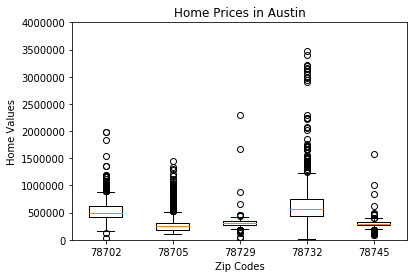

In [102]:
market_values = [value_78702, value_78705, value_78729, value_78732, value_78745]
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Home Values')
ax1.set_xlabel('Zip Codes')
ax1.boxplot(market_values, labels=['78702','78705','78729','78732','78745'])
plt.ylim(0,4000000)
plt.title('Home Prices in Austin')
plt.savefig('QuantilesPrices.png')
plt.show()

In [103]:
median_price_78702 = quartiles_78702[0.5]
median_price_78705 = quartiles_78705[0.5]
median_price_78729 = quartiles_78729[0.5]
median_price_78732 = quartiles_78732[0.5]
median_price_78745 = quartiles_78745[0.5]

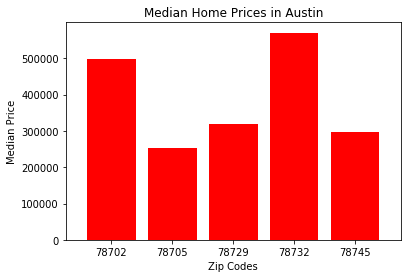

In [104]:
zipcodes = ['78702', '78705', '78729', '78732', '78745']
median_prices = [median_price_78702, median_price_78705, median_price_78729, median_price_78732, median_price_78745]
x_axis = np.arange(len(zipcodes))
plt.bar(x_axis, median_prices, color='r', align='center')
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, zipcodes)
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(median_prices)+30000)
plt.title('Median Home Prices in Austin')
plt.xlabel('Zip Codes')
plt.ylabel('Median Price')
plt.savefig('MedianPriceBar.png')
plt.show()

In [105]:
sqft_value_78702 = df_78702['Price per SqFt']
quartiles_78702 = sqft_value_78702.quantile([.25,.5,.75])
lowerq_78702 = quartiles_78702[0.25]
upperq_78702 = quartiles_78702[0.75]
iqr_78702 = upperq_78702-lowerq_78702

sqft_value_78705 = df_78705['Price per SqFt']
quartiles_78705 = sqft_value_78705.quantile([.25,.5,.75])
lowerq_78705 = quartiles_78705[0.25]
upperq_78705 = quartiles_78705[0.75]
iqr_78705 = upperq_78705-lowerq_78705

sqft_value_78729 = df_78729['Price per SqFt']
quartiles_78729 = sqft_value_78729.quantile([.25,.5,.75])
lowerq_78729 = quartiles_78729[0.25]
upperq_78729 = quartiles_78729[0.75]
iqr_78729 = upperq_78729-lowerq_78729

sqft_value_78732 = df_78732['Price per SqFt']
quartiles_78732 = sqft_value_78732.quantile([.25,.5,.75])
lowerq_78732 = quartiles_78732[0.25]
upperq_78732 = quartiles_78732[0.75]
iqr_78732 = upperq_78732-lowerq_78732

sqft_value_78745 = df_78745['Price per SqFt']
quartiles_78745 = sqft_value_78745.quantile([.25,.5,.75])
lowerq_78745 = quartiles_78745[0.25]
upperq_78745 = quartiles_78745[0.75]
iqr_78745 = upperq_78745-lowerq_78745

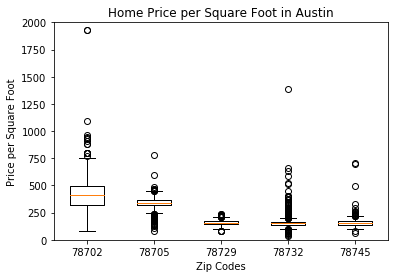

In [106]:
prices_sqft = [sqft_value_78702, sqft_value_78705, sqft_value_78729, sqft_value_78732, sqft_value_78745]
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Price per Square Foot')
ax1.set_xlabel('Zip Codes')
ax1.boxplot(prices_sqft, labels=['78702','78705','78729','78732','78745'])
plt.ylim(0, 2000)
plt.title('Home Price per Square Foot in Austin')
plt.savefig('QuantilePerSquareFoot.png')
plt.show()

In [107]:
median_price_sqft_78702 = quartiles_78702[0.5]
median_price_sqft_78705 = quartiles_78705[0.5]
median_price_sqft_78729 = quartiles_78729[0.5]
median_price_sqft_78732 = quartiles_78732[0.5]
median_price_sqft_78745 = quartiles_78745[0.5]

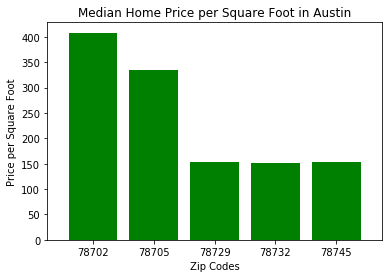

In [108]:
sqft_prices = [median_price_sqft_78702, median_price_sqft_78705, median_price_sqft_78729, median_price_sqft_78732, median_price_sqft_78745]
x_axis = np.arange(len(zipcodes))
plt.bar(x_axis, sqft_prices, color='g', align='center')
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, zipcodes)
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(sqft_prices)+20)
plt.title('Median Home Price per Square Foot in Austin')
plt.xlabel('Zip Codes')
plt.ylabel('Price per Square Foot')
plt.savefig('MedianPriceSqftBar.png')
plt.show()